# Problem Statement

We have data from BigMart 2013 sales for 1559 products across 10 stores in different cities. Our goal is to build a predictive model and find out the sales of each product at a particular store.

# Hypothesis Generation

* Healthy products are less common to be high in sales
* The outlet location will play a big role in the type of products sold
* 

# Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

# Data Exploration

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print('The shape of the Training Data is: ',df_train.shape), print('The shape of the Test Data is: ',df_test.shape)

The shape of the Training Data is:  (8523, 12)
The shape of the Test Data is:  (5681, 11)


(None, None)

We have a Total of 8523 records and 11 Feature columns and 1 Target columm (Item_Outlet_Sales).

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

We have 4 types of Outlets:

* Supermarket Type1
* Supermarket Type2
* Grocery Store
* Supermarket Type3

In [8]:
df_train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

We have 10 Outlets: 

* OUT049
* OUT018
* OUT010
* OUT013
* OUT027
* OUT045
* OUT017
* OUT046
* OUT035
* OUT019

In [9]:
df_train['Item_Identifier'].nunique()

1559

We have 1559 products accross 10 Outlets


# Exploratory Data Analysis(EDA)

In [10]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Handling Missing Data


In [11]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We need to replace the LF with Low Fat, reg with Regular, and low fat with Low Fat.

In [12]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [13]:
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
df_train.isnull().sum().sort_values()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                  1463
Outlet_Size                  2410
dtype: int64

In [15]:
df_test.isnull().sum().sort_values()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight                   976
Outlet_Size                  1606
dtype: int64

We have some null values in the Item_Weight and in the Outlet_Size

We can replace the missing values of the 'Item_Weight' column with the median value of the Item_Weight.





In [16]:
median_Item_Weight = df_train['Item_Weight'].median()
df_train['Item_Weight'].replace(np.nan, median_Item_Weight, inplace=True)

In [17]:
median_Item_Weight = df_test['Item_Weight'].median()
df_test['Item_Weight'].replace(np.nan, median_Item_Weight, inplace=True)

We will replace the missing values of the 'Outlet_Size' column with the mode value of the Outlet_Size 

In [18]:
mode_Outlet_Size = df_train['Outlet_Size'].mode().values[0]
df_train['Outlet_Size'].replace(np.nan, mode_Outlet_Size, inplace=True)

In [19]:
mode_Outlet_Size = df_test['Outlet_Size'].mode().values[0]
df_test['Outlet_Size'].replace(np.nan, mode_Outlet_Size, inplace=True)

In [20]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
df_train[df_train.Item_Visibility == 0].shape

(526, 12)

We can't have an Item_Visibilty equal to 0, so we will replace the zeros with the average of the Item_Visibility of each product.

In [23]:
Item_vis = df_train.pivot_table(values='Item_Visibility', index='Item_Identifier')
df_train.loc[df_train.Item_Visibility == 0, 'Item_Visibility'] = df_train.loc[df_train.Item_Visibility == 0,'Item_Identifier'].apply(lambda x: Item_vis.at[x, 'Item_Visibility'])

In [24]:
df_train[df_train.Item_Visibility == 0].shape

(0, 12)

In [25]:
Item_vis = df_test.pivot_table(values='Item_Visibility', index='Item_Identifier')
df_test.loc[df_test.Item_Visibility == 0, 'Item_Visibility'] = df_test.loc[df_test.Item_Visibility == 0,'Item_Identifier'].apply(lambda x: Item_vis.at[x, 'Item_Visibility'])

In [26]:
df_test[df_train.Item_Visibility == 0].shape

<ipython-input-26-f5290bd76a8b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test[df_train.Item_Visibility == 0].shape


(0, 11)

### Handling Duplicates

In [27]:
df_train.duplicated().sum()

0

In [28]:
df_test.duplicated().sum()

0

We don't have any duplicates

### Handling Outliers

In [29]:
numerical_columns = []
for i in df_train.columns:
  if (df_train.dtypes[i] == 'float64' or df_train.dtypes[i] == 'int64'):
    numerical_columns.append(i)

In [30]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

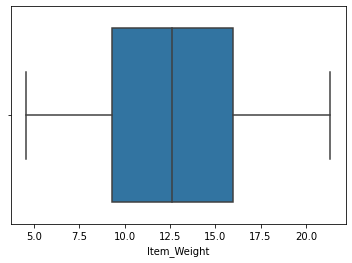

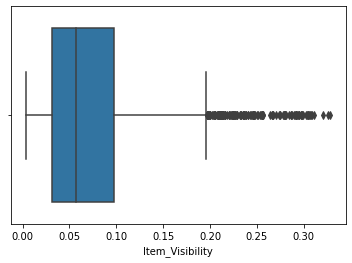

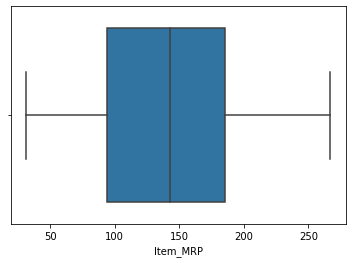

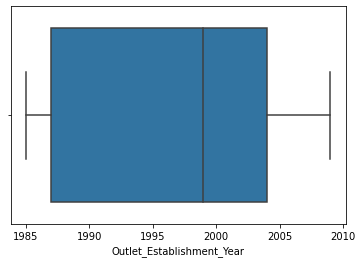

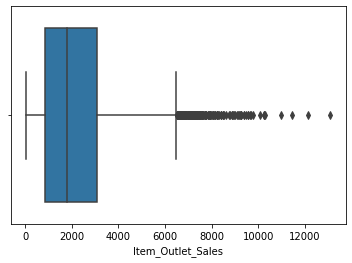

In [31]:
for i in numerical_columns:
  sns.boxplot(x=df_train[i])
  plt.show();

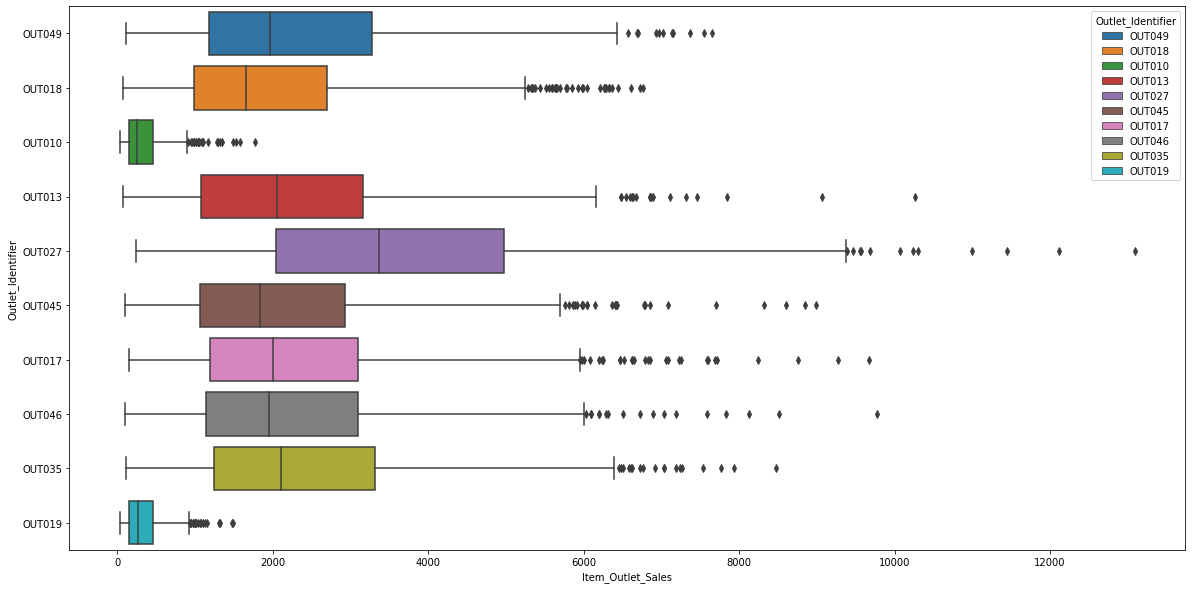

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_train, x="Item_Outlet_Sales", y="Outlet_Identifier", hue="Outlet_Identifier", dodge=False)
plt.show();

We don't have any outliers in the Item_Weight, Item_MPR and the Outlet_Establishment_Year columns, on the other hand we have some outliers in the Item_Visibility and the Item_Outlet_Sales columns.

In [33]:
def remove_outliers(colu):
  sorted(colu)
  Q1,Q3 = colu.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_limit = Q1 - (1.5*IQR)
  upper_limit = Q3 + (1.5*IQR)
  return lower_limit, upper_limit

In [34]:
df_group = df_train.groupby(['Item_Identifier','Outlet_Identifier'], as_index=False)['Item_Outlet_Sales'].mean()


In [35]:
df_group

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,DRA12,OUT010,283.6308
1,DRA12,OUT013,2552.6772
2,DRA12,OUT017,2552.6772
3,DRA12,OUT018,850.8924
4,DRA12,OUT035,992.7078
...,...,...,...
8518,NCZ54,OUT019,162.4552
8519,NCZ54,OUT027,5523.4768
8520,NCZ54,OUT045,2274.3728
8521,NCZ54,OUT046,4711.2008


In [36]:
df_group.sort_values(by=['Item_Outlet_Sales']).tail(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
1350,FDC17,OUT027,9678.0688
7616,NCM05,OUT046,9779.9362
7300,NCH18,OUT027,10072.8882
5349,FDU14,OUT027,10236.6750
2050,FDF39,OUT013,10256.6490
2728,FDI50,OUT027,10306.5840
4121,FDP33,OUT027,10993.6896
6736,FDZ20,OUT027,11445.1020
4286,FDQ19,OUT027,12117.5600
7171,NCE42,OUT027,13086.9648


In [37]:
low_limit_Item_Visibility, up_limit_Item_Visibility = remove_outliers(df_train.Item_Visibility)
df_train.Item_Visibility = np.where(df_train['Item_Visibility'] > up_limit_Item_Visibility, up_limit_Item_Visibility, df_train['Item_Visibility'])
df_train.Item_Visibility = np.where(df_train['Item_Visibility'] < low_limit_Item_Visibility, low_limit_Item_Visibility, df_train['Item_Visibility'])

In [38]:
low_limit_Item_Visibility, up_limit_Item_Visibility = remove_outliers(df_test.Item_Visibility)
df_test.Item_Visibility = np.where(df_test['Item_Visibility'] > up_limit_Item_Visibility, up_limit_Item_Visibility, df_test['Item_Visibility'])
df_test.Item_Visibility = np.where(df_test['Item_Visibility'] < low_limit_Item_Visibility, low_limit_Item_Visibility, df_test['Item_Visibility'])

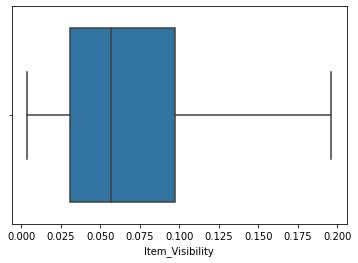

In [39]:
sns.boxplot(x=df_train.Item_Visibility)
plt.show();

### Analysis

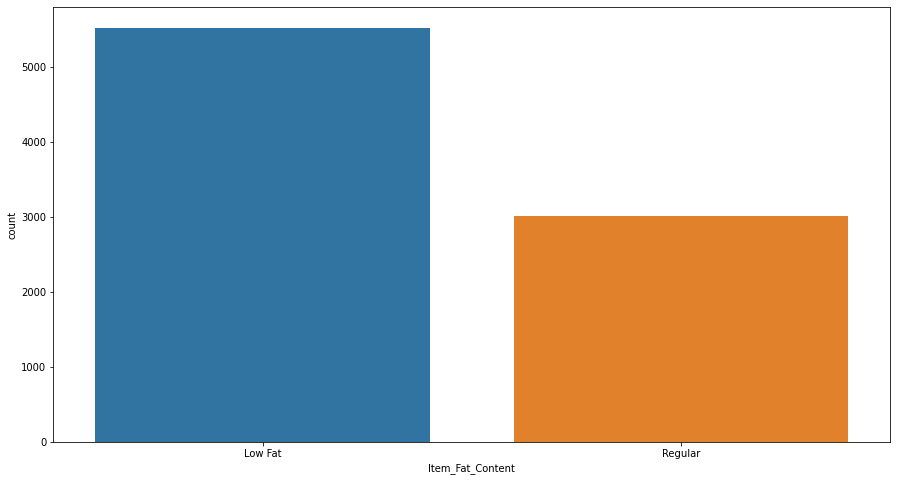

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(x='Item_Fat_Content', data=df_train)
plt.show();

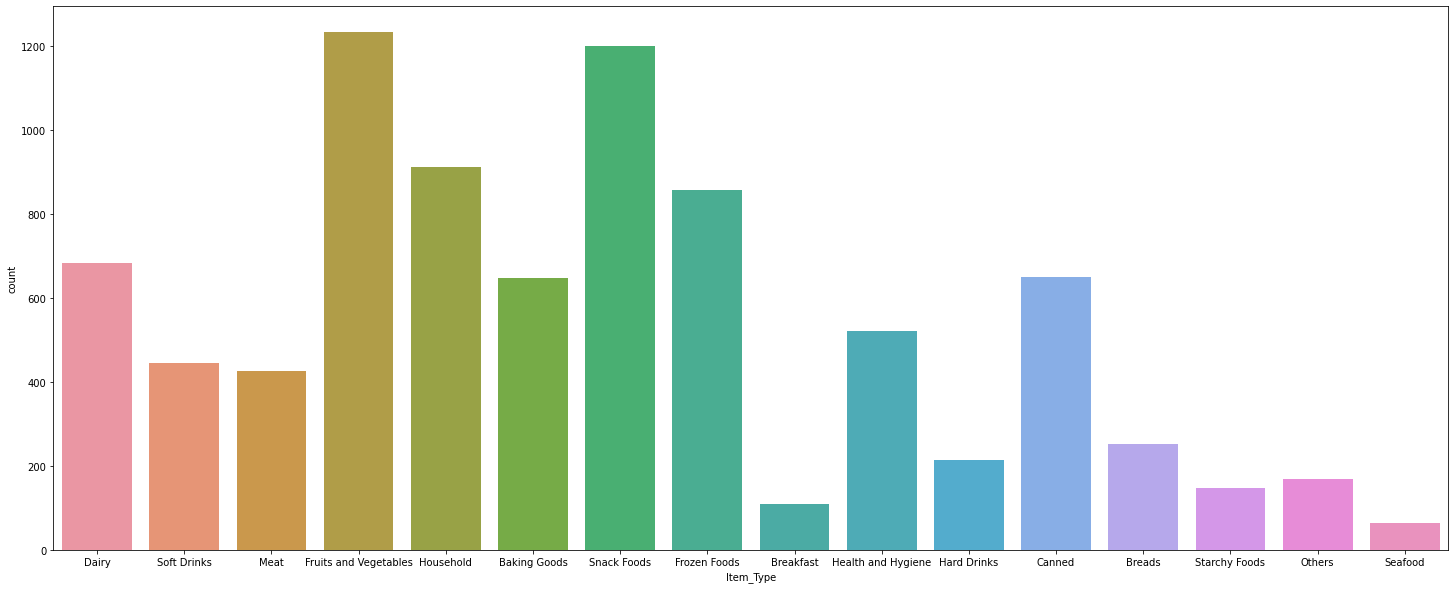

In [41]:
plt.figure(figsize=(25,10))
sns.countplot(x='Item_Type', data=df_train)
plt.show();

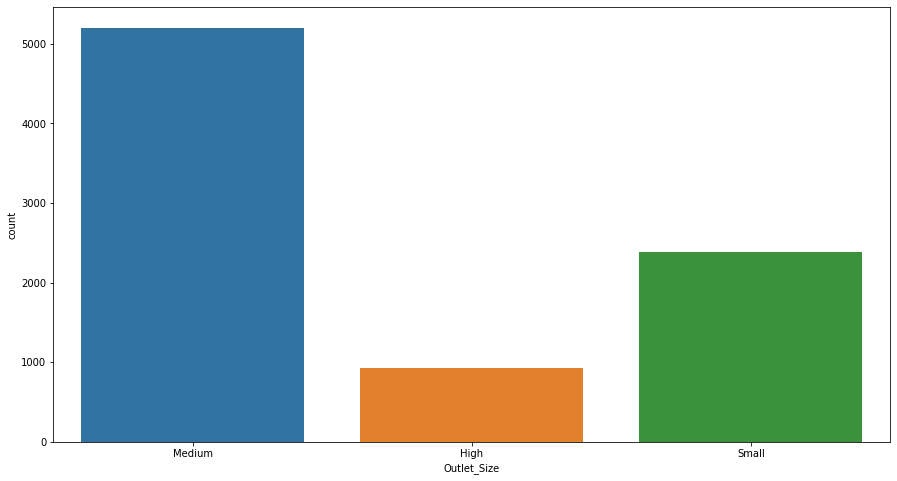

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(x='Outlet_Size', data=df_train)
plt.show();

### Bivariate Analysis

In [43]:
df_train.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().sort_values()

Item_Identifier
NCR42     110.966667
FDQ60     120.509800
FDQ04     261.437467
FDX10     291.121050
NCN29     311.061760
            ...     
DRK23    5464.886400
FDZ50    5512.824000
FDU55    5922.457450
NCL42    5962.017067
FDR45    6035.310550
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

The product that has the higest sales is NCL42.

The product that has the lowest sales is NCR42.

In [44]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020393,0.024951,0.007739,0.009693
Item_Visibility,-0.020393,1.000000,-0.004556,-0.064175,-0.117500
Item_MRP,0.024951,-0.004556,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.064175,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.117500,0.567574,-0.049135,1.000000


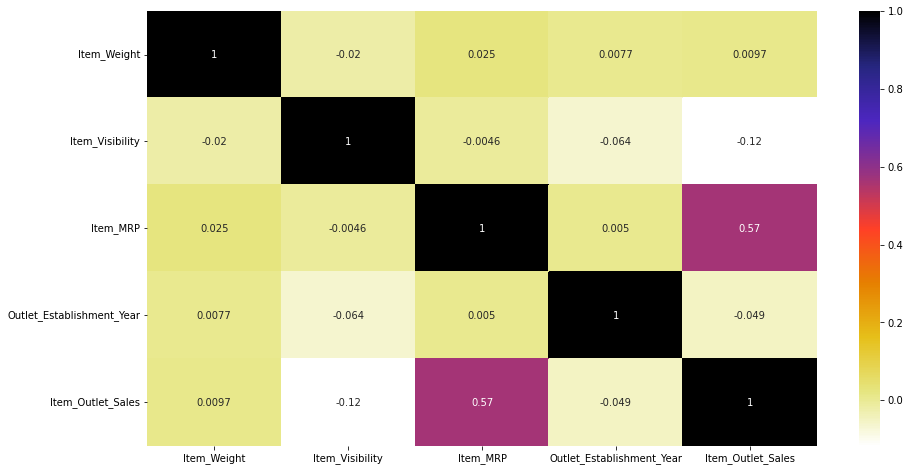

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show();

The Item_Outlet_Sales and the Item_MRP have a positive correlation (0.57) 

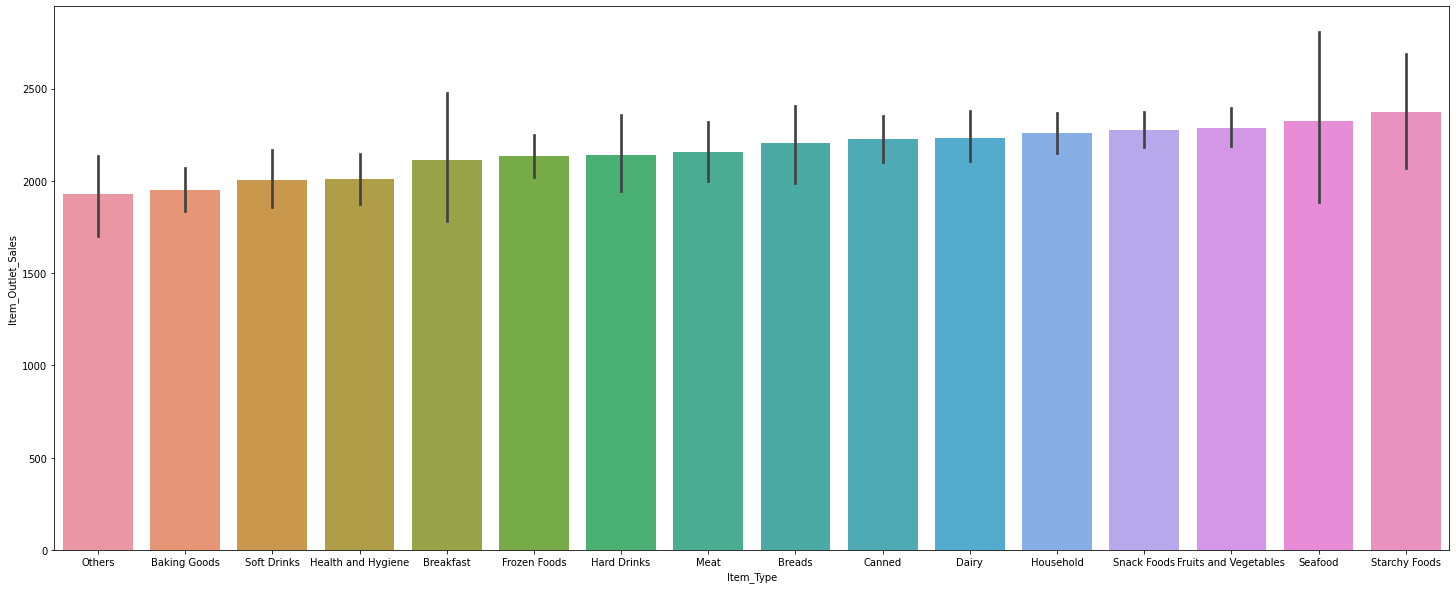

In [46]:
order = df_train.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values().index
plt.figure(figsize=(25,10))
sns.barplot(data=df_train, x='Item_Type', y='Item_Outlet_Sales', order=order)
plt.show();

The top items sold are the Starchy Foods and Seafood

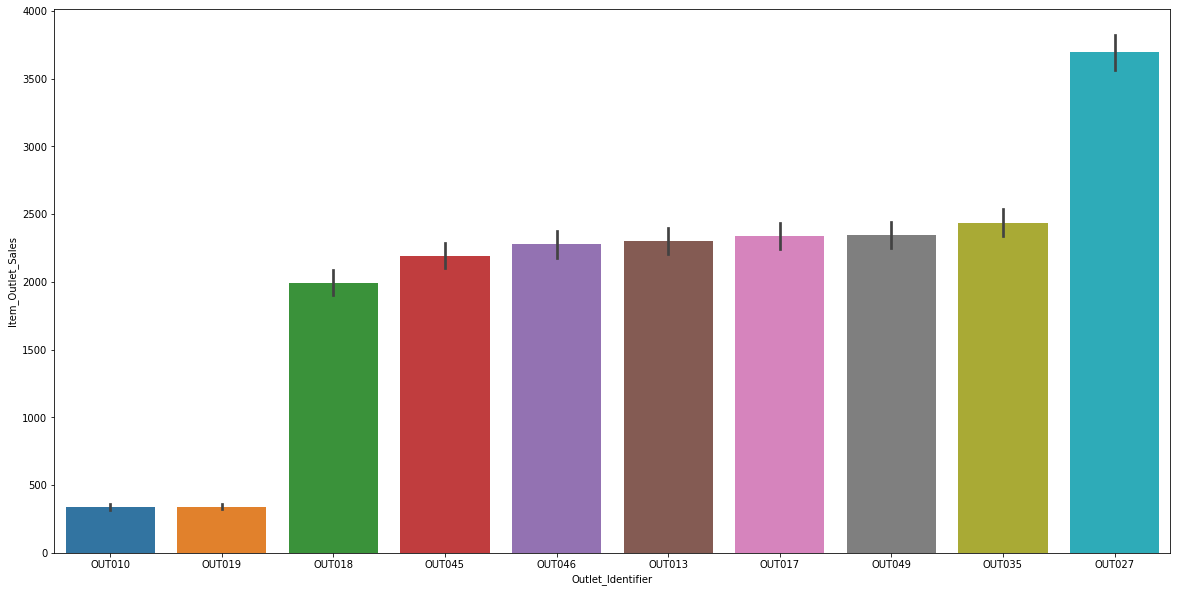

In [47]:
order = df_train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values().index
plt.figure(figsize=(20,10))
sns.barplot(data=df_train, x='Outlet_Identifier', y='Item_Outlet_Sales', order = order)
plt.show();

The Outlet OUT027 has the highest sales and OUT010 has the lowest sales.

### Feature Engineering

We will Drop the Item_Identifier, Outlet_Establishment_Year


* Nominal Encoding: 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier'. => oneHotEncoding()
* Ordinal Encoding: 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'. => LabelEncoder()



In [48]:
df_train.drop(columns = ['Item_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)
df_test.drop(columns = ['Item_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ordinal_enc = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in ordinal_enc:
  df_train[i] = le.fit_transform(df_train[i])
  df_test[i] = le.fit_transform(df_test[i])

In [50]:
nominal_enc = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier']
df_train = pd.get_dummies(df_train, columns = nominal_enc, drop_first = True)
df_test = pd.get_dummies(df_test, columns = nominal_enc, drop_first = True)

In [51]:
X = df_train.drop(columns = ['Item_Outlet_Sales'])
y = df_train['Item_Outlet_Sales']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_df_test_scaled = scaler.transform(df_test)

### Modeling

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
import time

In [55]:
def model_training(model, X_train, X_test, y_train, y_test):
  result = {}
  start_train = time.time()
  final_model = model.fit(X_train, y_train)
  end_train = time.time()
  result['train_time'] = end_train - start_train
  y_pred = final_model.predict(X_test)
  lr_mae = round(mean_absolute_error(y_test, y_pred),4)
  lr_mse = round(mean_squared_error(y_test, y_pred),4)
  lr_r2 = round(r2_score(y_test, y_pred),4)
  result['mean_absolute_error'] = lr_mae
  result['mean_squared_error'] = lr_mse
  result['r2_score'] = lr_r2
  return result, final_model

#### Linear Regresion

In [56]:
lr = LinearRegression()
linear_results, linear_model = model_training(LinearRegression(), X_train_scaled, X_test_scaled, y_train, y_test)
linear_results

{'train_time': 0.03113722801208496,
 'mean_absolute_error': 791.7629,
 'mean_squared_error': 1143503.4558,
 'r2_score': 0.5793}

#### Ridge

In [57]:
ridge = Ridge(alpha=0.1)
ridge_results, ridge_model = model_training(ridge, X_train_scaled, X_test_scaled, y_train, y_test)
ridge_results

{'train_time': 0.008272886276245117,
 'mean_absolute_error': 791.4308,
 'mean_squared_error': 1142733.1848,
 'r2_score': 0.5796}

#### Lasso

In [58]:
lasso = Lasso(alpha=0.1)
lasso_results, lasso_model = model_training(lasso, X_train_scaled, X_test_scaled, y_train, y_test)
lasso_results

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+09, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(


{'train_time': 0.5109140872955322,
 'mean_absolute_error': 791.3948,
 'mean_squared_error': 1142664.1984,
 'r2_score': 0.5796}

#### Random Forest

In [59]:
random_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2, 4, 6, 8],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
random_obj =RandomizedSearchCV(RandomForestRegressor(), param_distributions = random_params, cv=5, n_iter=5)
random_Forest_results, random_Forest_model = model_training(random_obj, X_train_scaled, X_test_scaled, y_train, y_test)
random_Forest_results

{'train_time': 167.48987698554993,
 'mean_absolute_error': 723.0259,
 'mean_squared_error': 1052430.585,
 'r2_score': 0.6128}

In [60]:
random_Forest_model.best_params_

{'n_estimators': 555,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [61]:
random_Forest_model.best_estimator_

RandomForestRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=555)

In [62]:
with open('random_forest_model', 'wb') as f:
  pickle.dump(random_Forest_model, f)

#### XGboost


In [63]:
params = {
    'learning_rate' : [0.05, 0.10, 0.20, 0.30],
    'max_depth' : [3, 4, 5, 7, 9, 11, 15],
    'min_child_weight' : [1, 3, 5, 7],
    'gamma' : [0.1, 0.2, 0.3, 0.4]
}
xgboost_obj = RandomizedSearchCV(XGBRegressor(), param_distributions = params, cv=5, n_iter=5)
xgboost_results, xgboost_model = model_training(xgboost_obj, X_train_scaled, X_test_scaled, y_train, y_test)
xgboost_results

[14:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:53:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'train_time': 37.24879026412964,
 'mean_absolute_error': 718.5074,
 'mean_squared_error': 1074256.6967,
 'r2_score': 0.6048}

In [64]:
xgboost_model.best_params_

{'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3}

In [65]:
xgboost_model.best_estimator_

XGBRegressor(gamma=0.3, learning_rate=0.05, max_depth=5)

In [66]:
with open('xgboost_model', 'wb') as f:
  pickle.dump(xgboost_model, f)

### Predicting the Test data

In [67]:
with open('xgboost_model', 'rb') as f:
  Final_model = pickle.load(f)

[14:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [68]:
Prediction_test_data = Final_model.predict(X_df_test_scaled)

In [69]:
len(Prediction_test_data)

5681

In [70]:
df = pd.DataFrame(Prediction_test_data, columns = ['Prediction'])

In [71]:
df.head()

,Prediction
0,1644.079956
1,1350.895508
2,625.782776
3,2351.356689
4,6219.901367


In [72]:
df.shape

(5681, 1)

In [74]:
df.to_csv('predictions_test_data.csv', index=False)